In [2]:
import pandas as pd

In [3]:
locust_df = pd.read_csv(
    './report/1713478810/locust-stats-200rps-50msz.csv_stats_history.csv',
    on_bad_lines='skip'
    )

In [7]:
locust_df

,Timestamp,User Count,Type,Name,Requests/s,Failures/s,50%,66%,75%,80%,...,99.9%,99.99%,100%,Total Request Count,Total Failure Count,Total Median Response Time,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size
0,1713478811,0.0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,1713478813,1.0,NaN,Aggregated,0.0,0.0,210.0,220.0,230.0,230.0,...,250.0,250.0,250.0,20.0,0.0,180.0,203.200000,173.0,246.0,15488.0
2,1713478815,1.0,NaN,Aggregated,0.0,0.0,190.0,190.0,190.0,190.0,...,200.0,200.0,200.0,20.0,0.0,180.0,184.250000,175.0,195.0,15488.0
3,1713478818,1.0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,1713478820,1.0,NaN,Aggregated,0.0,0.0,180.0,190.0,190.0,190.0,...,190.0,190.0,190.0,41.0,0.0,180.0,179.829268,150.0,191.0,15488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1713479106,10.0,NaN,Aggregated,199.9,0.0,180.0,220.0,230.0,230.0,...,270.0,290.0,290.0,58601.0,0.0,180.0,174.284313,21.0,291.0,15488.0
101,1713479108,10.0,NaN,Aggregated,196.1,0.0,180.0,220.0,230.0,230.0,...,270.0,290.0,290.0,58781.0,0.0,180.0,174.252973,21.0,291.0,15488.0
102,1713479110,10.0,NaN,Aggregated,198.2,0.0,180.0,220.0,230.0,230.0,...,260.0,290.0,290.0,59200.0,0.0,180.0,174.237432,21.0,291.0,15488.0
103,1713479112,0.0,NaN,Aggregated,195.3,0.0,180.0,220.0,230.0,230.0,...,260.0,290.0,290.0,59801.0,0.0,180.0,174.207722,21.0,291.0,15488.0


In [8]:
locust_df['Timestamp'].min()

44

In [9]:
locust_df['95%'][100:].max()

240.0

In [10]:
import numpy as np
# Calculate the z-scores for 'Timestamp' and '95%'
z_scores_timestamp = np.abs((locust_df['Timestamp'] - locust_df['Timestamp'].mean()) / locust_df['Timestamp'].std())
z_scores_95 = np.abs((locust_df['95%'] - locust_df['95%'].mean()) / locust_df['95%'].std())

# Set the threshold for outlier detection
threshold = 3

# Prune outliers from 'Timestamp' and '95%'
locust_df = locust_df[(z_scores_timestamp <= threshold) & (z_scores_95 <= threshold)]

# Ensure 'Timestamp' and '95%' have the same length after pruning
min_length = min(len(locust_df['Timestamp']), len(locust_df['95%']))
locust_df = locust_df[:min_length]


In [11]:
locust_df = locust_df[locust_df['Timestamp'].astype(str).str.len() == 10]

In [12]:
locust_df['Timestamp'].sort_values()

1      1713478813
2      1713478815
4      1713478820
5      1713478826
6      1713478828
          ...    
100    1713479106
101    1713479108
102    1713479110
103    1713479112
104    1713479114
Name: Timestamp, Length: 93, dtype: int64

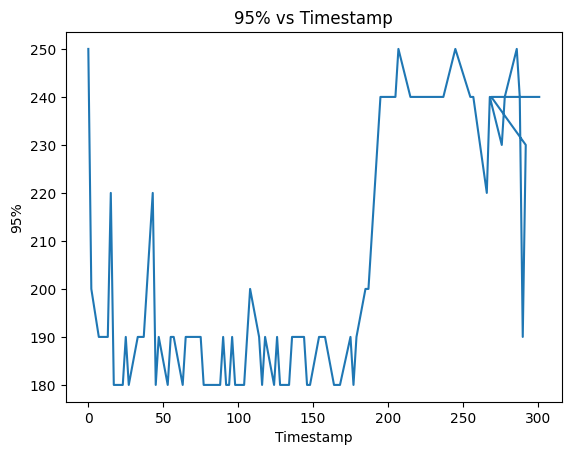

In [13]:
import matplotlib.pyplot as plt

plt.plot(locust_df['Timestamp'] - locust_df['Timestamp'].min(), locust_df['95%'])
plt.xlabel('Timestamp')
plt.ylabel('95%')
plt.title('95% vs Timestamp')
plt.show()
